In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
data = pd.read_csv('breast-cancer-wisconsin1.csv', header=None,
                  usecols=range(1, 11))

data.head()

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       699 non-null    int64
 1   2       699 non-null    int64
 2   3       699 non-null    int64
 3   4       699 non-null    int64
 4   5       699 non-null    int64
 5   6       699 non-null    int64
 6   7       699 non-null    int64
 7   8       699 non-null    int64
 8   9       699 non-null    int64
 9   10      699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [77]:
for i in range(10):
    print(data.iloc[:, i].unique())

[ 5  3  6  4  8  1  2  7 10  9]
[ 1  4  8 10  2  3  7  5  6  9]
[ 1  4  8 10  2  3  5  6  7  9]
[ 1  5  3  8 10  4  6  2  9  7]
[ 2  7  3  1  6  4  5  8 10  9]
[ 1 10  2  4  3  9  7  5  8  6]
[ 3  9  1  2  4  5  7  8  6 10]
[ 1  2  7  4  5  3 10  6  9  8]
[ 1  5  4  2  3  7 10  8  6]
[2 4]


In [80]:
import random
from pandas import read_csv
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier


class BCW:
    NUM_FOLDS = 5
    
    def __init__(self, randomSeed):
        self.randomSeed = randomSeed
        
        self.data = read_csv('breast-cancer-wisconsin1.csv', 
                             header=None,
                             usecols=range(1, 11))
        
        self.x = self.data.iloc[:, :9]
        self.y = self.data.iloc[:, 9]
        
        self.kfold = model_selection.KFold(n_splits=self.NUM_FOLDS,
                                          random_state=self.randomSeed,
                                          shuffle=True)
        
        self.classifier = DecisionTreeClassifier(random_state=self.randomSeed)
        
    def __len__(self):
        return self.x.shape[1]
    
    def getMeanAccuracy(self, zeroOneList):
        
        zeroIndices = [i for i, n in enumerate(zeroOneList) if n == 0]
        currentX = self.x.drop(self.x.columns[zeroIndices], axis=1)
        
        cv_results = model_selection.cross_val_score(self.classifier,
                                                   currentX, self.y,
                                                   cv=self.kfold,
                                                   scoring='accuracy')
        
        return cv_results.mean()
    
bcw = BCW(randomSeed=42)

allOnes = [1] * len(bcw)
print("-- Выделены все признаки: ", allOnes, ", верность = ", 
     bcw.getMeanAccuracy(allOnes))

-- Выделены все признаки:  [1, 1, 1, 1, 1, 1, 1, 1, 1] , верность =  0.9398972250770811


In [71]:
import deap
from deap import tools
from deap import algorithms

def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook

C:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	max     	avg     
0  	50    	0.947357	0.907666
1  	41    	0.947357	0.929996
2  	40    	0.947357	0.935076
3  	43    	0.947928	0.936512
4  	42    	0.947928	0.936709
5  	38    	0.947928	0.938331
6  	43    	0.947928	0.939578
7  	41    	0.947928	0.938041
8  	44    	0.947928	0.941254
9  	44    	0.947928	0.938834
10 	42    	0.947928	0.941636
11 	42    	0.947928	0.941306
12 	41    	0.947928	0.940951
13 	39    	0.947928	0.941995
14 	44    	0.947928	0.937789
15 	44    	0.947928	0.942073
16 	43    	0.947928	0.942669
17 	41    	0.947928	0.945098
18 	42    	0.947928	0.926698
19 	44    	0.947928	0.943858
20 	44    	0.947928	0.943246
21 	38    	0.948367	0.944881
22 	43    	0.948367	0.943604
23 	45    	0.948367	0.944018
24 	41    	0.948367	0.940287
25 	39    	0.948367	0.942326
26 	44    	0.948367	0.943153
27 	43    	0.948367	0.942676
28 	41    	0.948367	0.943424
29 	42    	0.948367	0.943638
30 	45    	0.948367	0.942448
31 	41    	0.948367	0.944635
32 	39    	0.948367	0.944685
33 	41    	0.9

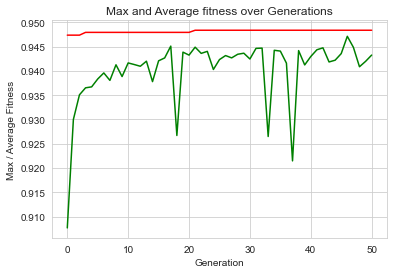

In [82]:
from deap import base, creator, tools
import deap
import random
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

POPULATION_SIZE = 50
P_CROSSOVER = 0.9
P_MUTATION = 0.3
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 5
FEATURE_PENALTY_FACTOR = 0.001

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

bcw = BCW(RANDOM_SEED)

toolbox = base.Toolbox()

creator.create("FitnessMax", base.Fitness, weights=(1.0,))

creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox.register("zeroOrOne", random.randint, 0, 1)

toolbox.register("individualCreator", tools.initRepeat, creator.Individual,
                toolbox.zeroOrOne, len(bcw))

toolbox.register("populationCreator", tools.initRepeat, list, 
                toolbox.individualCreator)

def bcwClassificationAccuracy(individual):
    numFeaturesUsed = sum(individual)
    if numFeaturesUsed == 0:
        return 0.0,
    else:
        accuracy = bcw.getMeanAccuracy(individual)
        return accuracy - FEATURE_PENALTY_FACTOR * numFeaturesUsed,

toolbox.register("evaluate", bcwClassificationAccuracy)

toolbox.register("select", tools.selTournament, tournsize=2)

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(bcw))


population = toolbox.populationCreator(n=POPULATION_SIZE)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

population, logbook = eaSimpleWithElitism(population, 
                                          toolbox,
                                          cxpb=P_CROSSOVER, 
                                          mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS,
                                          stats=stats, 
                                          halloffame=hof,
                                          verbose=True)

print("- Лучшие решения -")
for i in range(HALL_OF_FAME_SIZE):
    print(i, ": ", hof.items[i], ", приспособленность = ", 
          hof.items[i].fitness.values[0],
         ", верность = ", bcw.getMeanAccuracy(hof.items[i]),
         ", признаков = ", sum(hof.items[i]))
    
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over Generations')
plt.show()

In [83]:
0.9513669064748201-0.9398972250770811

0.011469681397739073

Лучшие признаки: 3, 5, 9